In [1]:
from slater_dl_wrapper.models import MultiLayerPerceptron
from slater_dl_wrapper.helpers import *
import torch

In [2]:
RANDOM_SEED = 1
BATCH_SIZE = 5
NUM_EPOCHS = 200
# DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE = torch.device("cpu")
print(DEVICE)

cpu


In [3]:
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

train_size = 20

train_dataset = Subset(datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True), range(train_size))
valid_dataset = Subset(datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True), range(train_size, 1000 + train_size))

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f'Train: {len(train_dataset)}')
print(f'Valid: {len(valid_dataset)}')

Train: 20
Valid: 1000


In [4]:
torch.manual_seed(RANDOM_SEED)
model = MultiLayerPerceptron(num_features=28**2,
                             num_classes=10,
                             hidden_sizes=[50, 20],
                            #  activations='ReLU',
                             dropout_probs=[0.1],
                             flatten=True)

print(model)

MultiLayerPerceptron(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.1, inplace=False)
    (2): Linear(in_features=784, out_features=50, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.1, inplace=False)
    (5): Linear(in_features=50, out_features=20, bias=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=20, out_features=10, bias=True)
  )
)


Time	Epoch	Loss	Train	Valid
00:00	1	2.2329	20.00	11.60
00:00	2	2.3264	20.00	11.90
00:00	3	2.1642	20.00	12.80
00:00	4	2.2520	35.00	19.10
00:00	5	2.0381	35.00	17.70
00:00	6	2.1241	35.00	19.20
00:00	7	1.9583	30.00	13.70
00:00	8	1.9788	40.00	19.50
00:00	9	1.6357	40.00	19.40
00:00	10	2.2628	45.00	23.20
00:00	11	1.7545	60.00	28.10
00:00	12	1.7220	65.00	30.10
00:00	13	1.0746	60.00	31.20
00:00	14	1.4774	75.00	31.80
00:00	15	0.7254	85.00	40.20
00:00	16	1.2881	80.00	33.40
00:00	17	0.8797	70.00	36.40
00:00	18	0.3232	90.00	42.80
00:00	19	0.7450	95.00	41.70
00:00	20	1.1710	95.00	40.50
00:00	21	0.6745	95.00	46.20
00:00	22	0.8960	95.00	40.30
00:00	23	0.6747	100.00	54.30
00:00	24	0.4159	95.00	53.10
00:00	25	0.5599	100.00	49.60
00:00	26	0.1018	100.00	51.10
00:00	27	0.2240	100.00	52.00
00:00	28	0.3514	100.00	54.60
00:00	29	0.0814	100.00	54.60
00:00	30	0.1780	100.00	55.90
00:00	31	0.1334	100.00	55.10
00:00	32	0.1662	100.00	54.00
00:00	33	0.4187	100.00	50.80
00:00	34	0.2222	100.00	57.60
00:00	35	0.0186	10

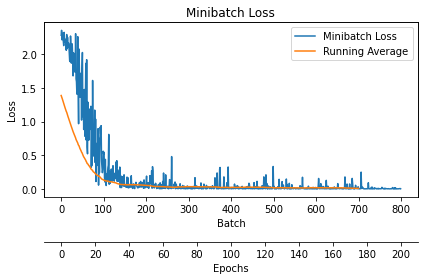

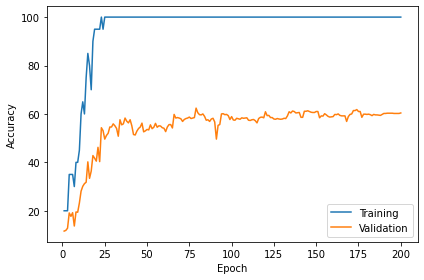

In [5]:
minibatch_loss_list, train_acc_list, valid_acc_list = train(model,
                                                            NUM_EPOCHS,
                                                            train_loader,
                                                            valid_loader=valid_loader,
                                                            learning_rate=0.1,
                                                            device=DEVICE)

plot_training_loss(minibatch_loss_list, NUM_EPOCHS, len(train_dataset) // BATCH_SIZE, results_dir=None, averaging_iterations=100)
plot_accuracy(train_acc_list=train_acc_list, valid_acc_list=valid_acc_list, results_dir=None)